# Wind Energy in Germany

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set default figure style
sns.set_style("darkgrid")

In [2]:
# Read data
file_path = Path("../data/germany_wind_data.csv")
raw_data = pd.read_csv(file_path, parse_dates=["utc_timestamp"], index_col="utc_timestamp")
raw_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [3]:
# Remove index name
raw_data.index.name = None
# Rename columns
raw_data = raw_data.rename(columns={"wind_generation_actual": "generated", "wind_capacity": "capacity"})

## Dataset overview

In [4]:
# Data Overview
print(raw_data.info())
print(100 * "-")
print("Number of unique values:")
print(raw_data.nunique())

# Check for missing values
missing_values = raw_data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check for duplicate entries
duplicate_entries = raw_data.duplicated().sum()
print("\nNumber of Duplicate Entries:", duplicate_entries)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   generated    1094 non-null   float64
 1   capacity     1094 non-null   float64
 2   temperature  1094 non-null   float64
dtypes: float64(3)
memory usage: 34.2 KB
None
----------------------------------------------------------------------------------------------------
Number of unique values:
generated      1093
capacity        931
temperature    1063
dtype: int64

Missing Values:
 generated      0
capacity       0
temperature    0
dtype: int64

Number of Duplicate Entries: 0


In [5]:
# Create ploting function
def plot_timeseries(dataframe:pd.DataFrame) -> None:
    """
    Takes timeseries dataframe with columns "temperature", "generated" and "capacity".
    Plots subplot with one row for each column and shared time axis.
    """
    fig, axes = plt.subplots(3, sharex=True, figsize=(10, 8))
    dataframe["temperature"].plot(ax=axes[0])
    dataframe["generated"].plot(ax=axes[1])
    dataframe["capacity"].plot(ax=axes[2])
    # Set titles
    axes[0].set_title("Temperature")
    axes[1].set_title("Wind generation")
    axes[2].set_title("Wind capacity")
    # Set y-labels
    axes[0].set_ylabel("Temperature [°C]")
    axes[1].set_ylabel("Daily wind production [MW]")
    axes[2].set_ylabel("Electrical capacity [MW]")
    # Set x-labels
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[2].set_xlabel("")

    # Display the plot
    plt.tight_layout()
    plt.show()

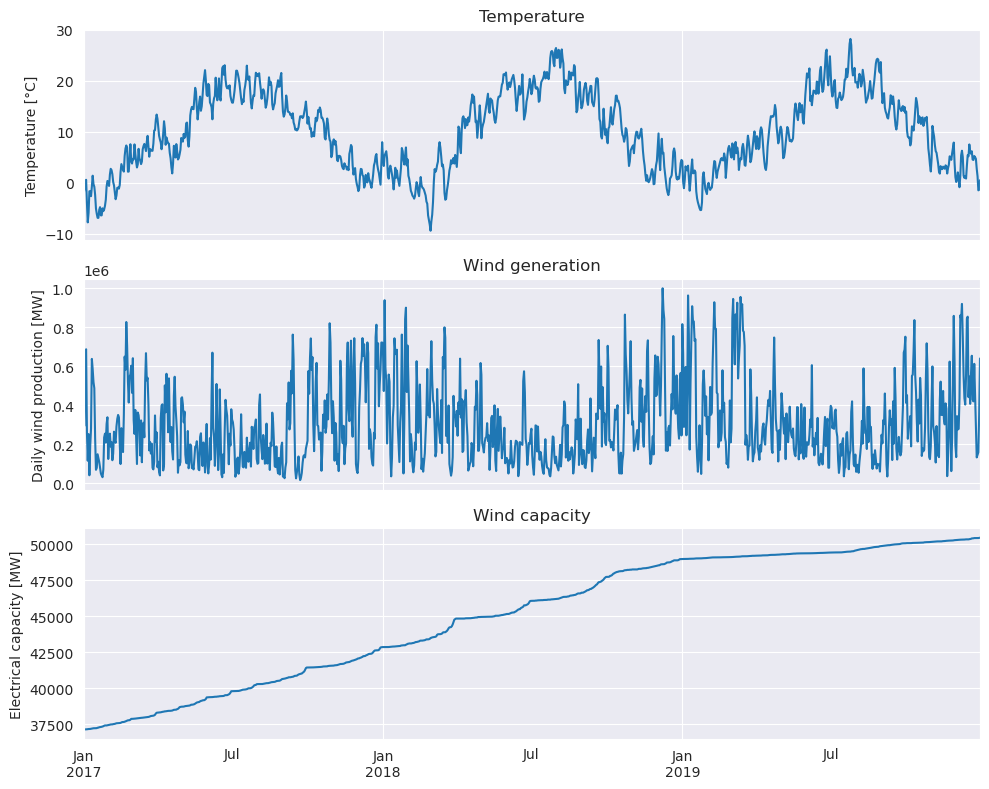

In [6]:
# Plot features over whole time
plot_timeseries(raw_data)

- Temperature has the expected seasonality with peaks in summer
- Wind generation is very fluctuative, but could show a small seasonality towards less production in summer
- Wind capacity simply increases linearly until 2019 and then starts to decrease

In [7]:
# Zoom in into yearly plots
data_2017 = raw_data.loc["2017"]
data_2018 = raw_data.loc["2018"]
data_2019 = raw_data.loc["2019"]

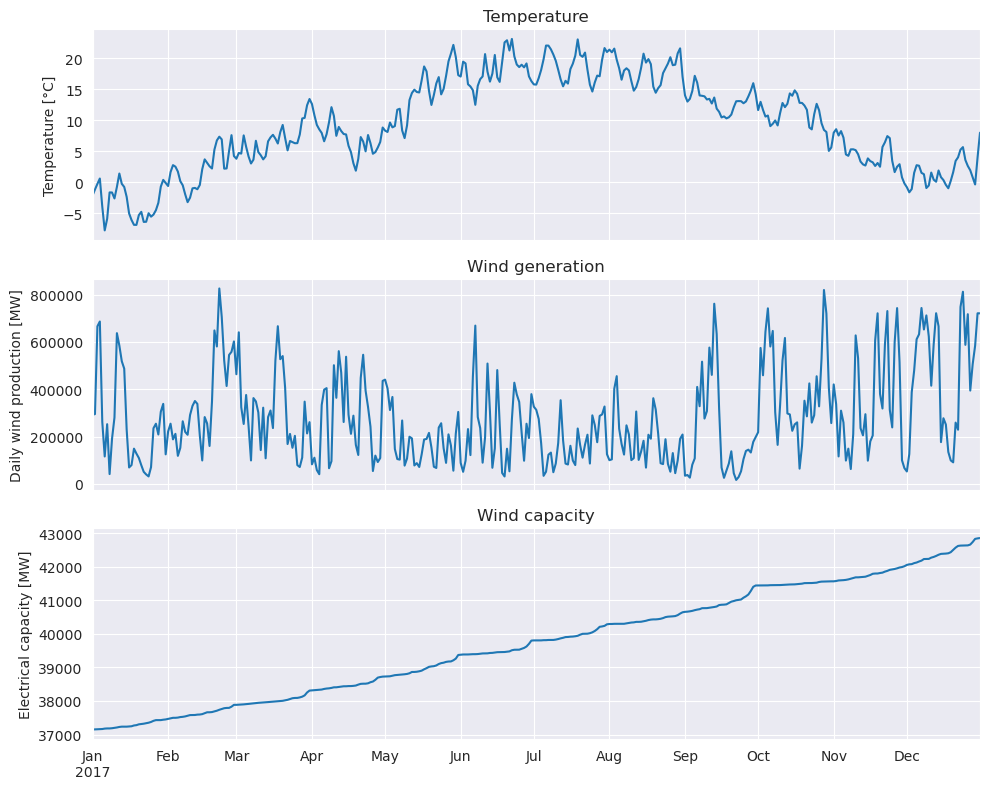

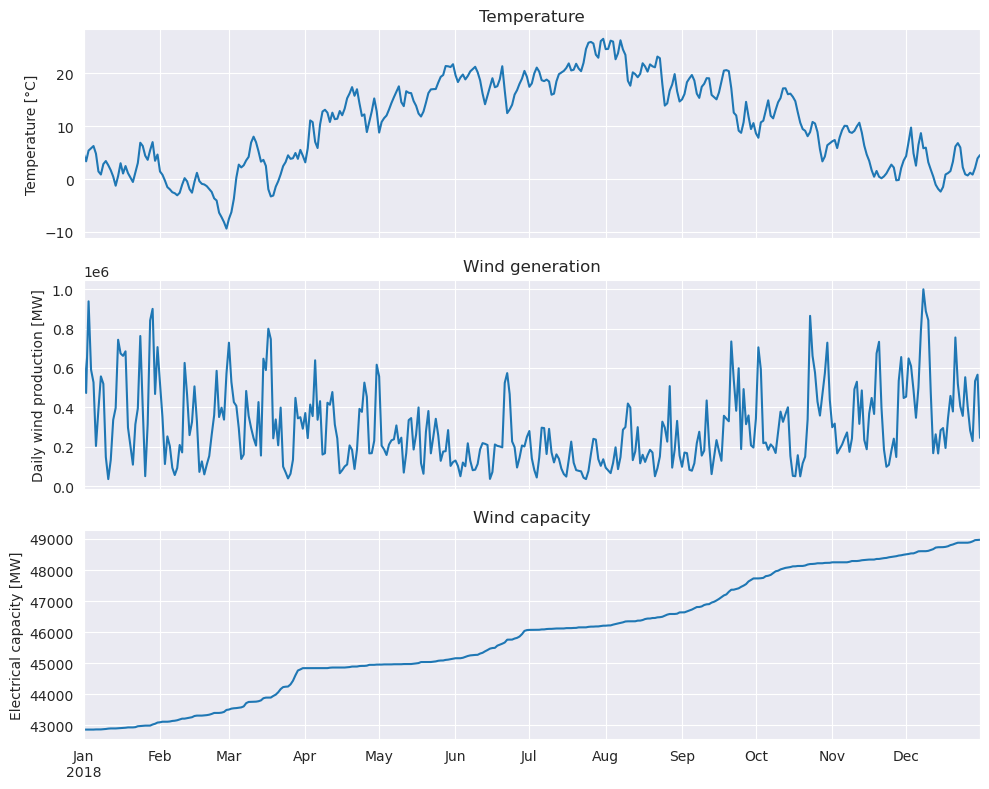

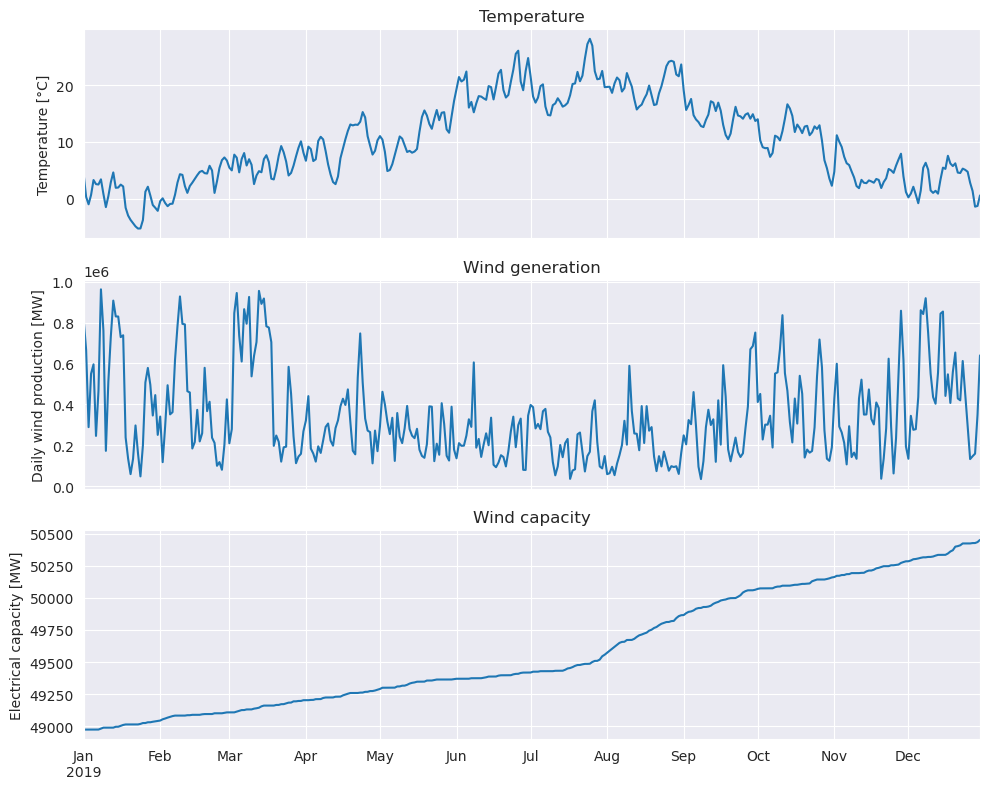

In [8]:
# Plot subsets
for subset in [data_2017, data_2018, data_2019]:
    plot_timeseries(subset)

- The 3 years do not look different temperature-wise
- Wind capacity is somewhat different 2019
- Wind generation needs further investigation

In [9]:
# Check how plausible wind capacity actually is
raw_data.head(20)

,generated,capacity,temperature
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
2017-01-06 00:00:00+00:00,115720.0,37176.208,-7.724
2017-01-07 00:00:00+00:00,252308.0,37181.000,-5.861
2017-01-08 00:00:00+00:00,41260.0,37181.250,-1.616
2017-01-09 00:00:00+00:00,190982.0,37187.458,-1.629
2017-01-10 00:00:00+00:00,280371.0,37198.458,-2.586


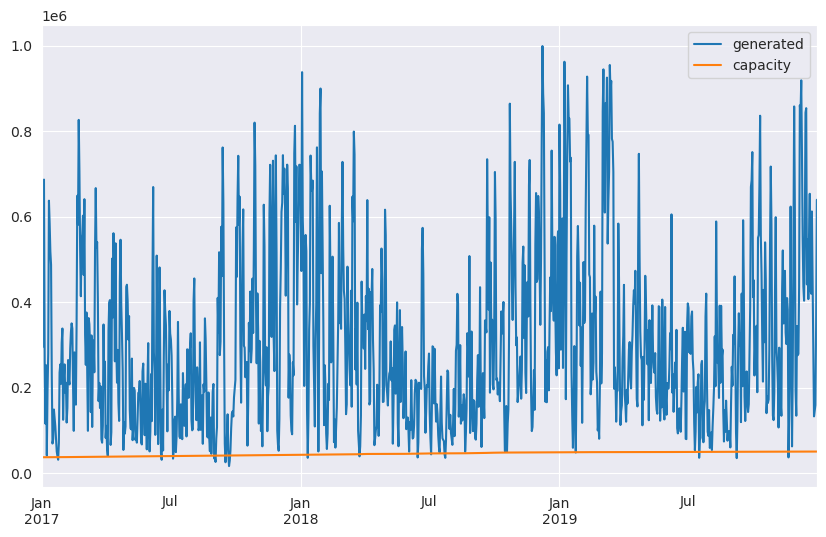

In [10]:
# Check on which scales wind capacity and production are
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Plot the first two columns (wind_generation_actual and wind_capacity)
raw_data.iloc[:, 0:2].plot(ax=ax)

# Remove the x-label
ax.set_xlabel("")
plt.show()

Wind capacity should be the maximum electricity production possible, therefore it is odd that some values are lower than the actual production

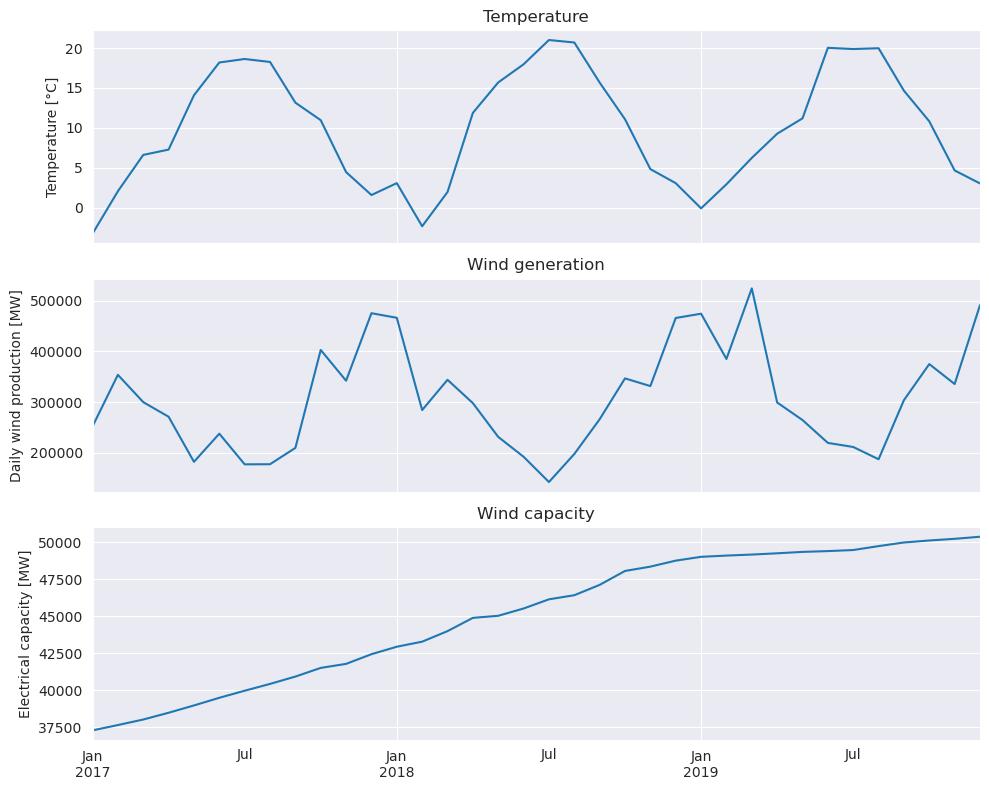

In [11]:
# Check for monthly aggregation
plot_timeseries(raw_data.resample("ME").mean())

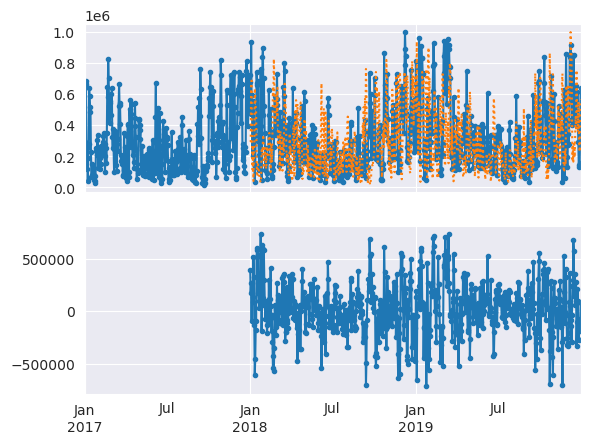

In [24]:
# Check for yearly seasonality
diff_yearly = raw_data["generated"].diff(365)

# Plot time series and shifted time series with differences
fix, axes = plt.subplots(2, 1, sharex=True)
raw_data["generated"].plot(ax=axes[0], legend=False, marker=".")
raw_data["generated"].shift(365).plot(ax=axes[0], grid=True, legend=False, linestyle=":") # Shifts index by 7
diff_yearly.plot(ax=axes[1], grid=True, marker=".")
plt.show()

In [25]:
# Calculate mean absolute percentage error
targets = raw_data["generated"]
(diff_yearly / targets).abs().mean()

0.8827351370073503

/tmp/ipykernel_1261/647815106.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = raw_data["generated"].resample("M").mean() # Compute mean for each month


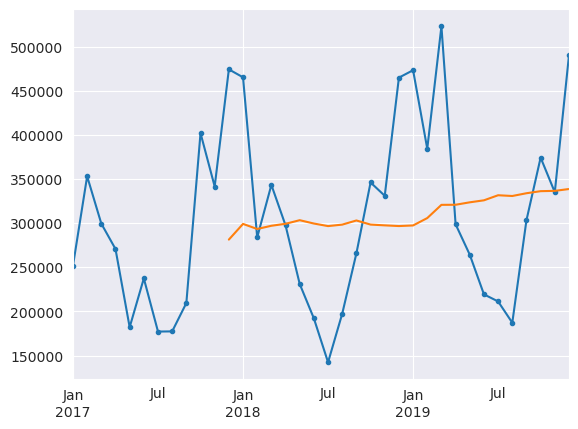

In [27]:
# Aggregate passengers for every month
monthly_df = raw_data["generated"].resample("M").mean() # Compute mean for each month
#pandas.DataFrame.resample: Resample time-series data.

rolling_average_12_months = monthly_df.rolling(window=12).mean()
#pandas.DataFrame.rolling: Provide rolling window calculations

# Plot data from each month for 18 years with rolling average
fix, axes = plt.subplots()
monthly_df.plot(ax=axes, marker=".")
rolling_average_12_months.plot(ax=axes, grid=True, legend=False);

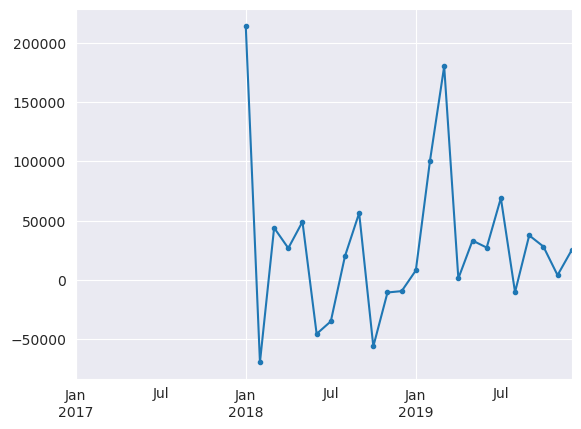

In [28]:
monthly_df.diff(12).plot(grid=True, marker=".");